In [1]:
import math
import sklearn.datasets as ds
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.random as nprand
import random as r
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Data generation

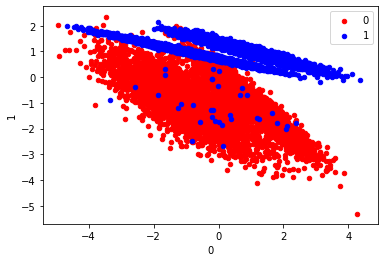

In [2]:
raw_data = ds.make_classification(n_features=2, 
                                  n_classes=2,
                                  n_informative=2,
                                  n_redundant=0,
                                  n_samples=15000,
                                  random_state=22)
data = pd.DataFrame(raw_data[0])
data['label'] = raw_data[1]
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = data.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
pyplot.show()
val_ds = data[10000:]
data = data[:10000]

In [3]:
for i in range(len(data)):
    if data['label'][i] == 1:
        data['label'][i] = r.choice((0, 1, 1))

/home/monty/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/monty/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


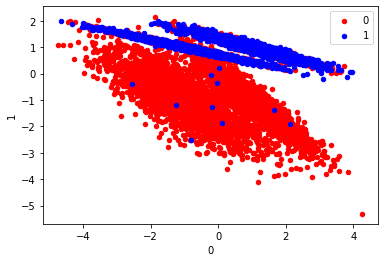

In [4]:
fig, ax = pyplot.subplots()
grouped = data.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
pyplot.show()

# Data splitting for training, test and validation

In [5]:
(data_train, data_test) = train_test_split(data, test_size=0.2, random_state=0)

In [6]:
x_train = data_train.filter(items=[0, 1])
y_train = data_train['label']
x_test = data_test.filter(items=[0, 1])
y_test = data_test['label']
x_val = val_ds.filter(items=[0, 1])

model = XGBClassifier()
model.fit(x_train, y_train)

model_probs = model.predict_proba(x_val)
preds = model.predict(x_val)
vals = [i[1] for i in model_probs]
probs = []
for i in range(len(preds)):
    if preds[i]:
        probs.append(model_probs[i][1]-0.5)
    else:
        negprobs.append(model_probs[i][1])

In [7]:
test_data = x_test[:]
test_data['label'] = [round(i) for i in model.predict(x_test)]

/home/monty/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Final classification

In [8]:
c = sum(probs) / len(probs)
c

0.19930542075298602

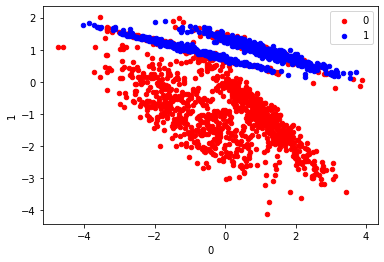

In [9]:
fig, ax = pyplot.subplots()
grouped = test_data.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
pyplot.show()

In [10]:
pred_probs = model.predict_proba(x_test)
predicts = model.predict(x_test)
negprobs = []
new_label = []
s = 0
for i in range(len(predicts)):
    if not predicts[i]:
        if (1 - c) / c * pred_probs[i][1] / (1 - pred_probs[i][1]) > 0.2:
            test_data['label'][i] = 1
            new_label.append(1)
        else:
            new_label.append(0)
    else:
        new_label.append(1)
test_data['label'] = new_label

/home/monty/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/monty/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/monty/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

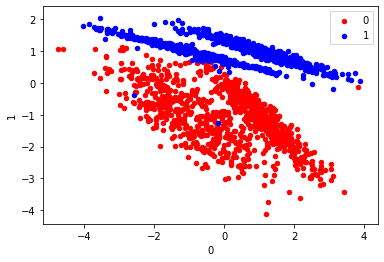

In [11]:
fig, ax = pyplot.subplots()
grouped = test_data.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
pyplot.show()